<a href="https://colab.research.google.com/github/Swati051090/Learnbay_2/blob/master/Society_score_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Society Score Project

The aim of this project is to get the valuable insights from the database if it contain a set of independent variables that correlate to the energy star rating and predicting scores for the buildings without the Energy Star Score.

# Context

The dataset contains building energy efficiency data.We hypothesize that this dataset contains independent variables that might be used to infer interesting facts about
buildings in New York.We will investigate the features that impact the Energy Star Score as well as we will predict the Energy Star Score for the buildings that don't have one.

# Importing required Python Libraries

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to support warnings
import warnings
warnings.filterwarnings("ignore")


# Importing Data

In [ ]:
#importing data
df=pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Society Score\data\Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

In [ ]:
#getting first 5 samples
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05-01-2017 17:32,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [ ]:
#shape of the data
print(df.shape)

(11746, 60)


In [ ]:
#creating a copy of the data
data_copy=df.copy()

In [ ]:
#checking copied or not
data_copy.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05-01-2017 17:32,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [ ]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [ ]:
#getting the description of the data
df.describe

<bound method NDFrame.describe of        Order  Property Id                                 Property Name  \
0          1        13286                                       201/205   
1          2        28400                    NYP Columbia (West Campus)   
2          3      4778226                                 MSCHoNY North   
3          4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4          5      4778288                               Neuro Institute   
...      ...          ...                                           ...   
11741  14988      4940453                     Advanced: 24 Monroe Place   
11742  14989      4940416   Advanced: 150 Joralemon St / 124 Clinton St   
11743  14990      4628296                         (9267) - 267 Sixth St   
11744  14991      4940464               Advanced: 27 Prospect Park West   
11745  14993      4952165                        Tryad: 420 Clinton Ave   

                        Parent Property Id  \
0                  

# EDA(Exploratory Data Analysis)

In [ ]:
#checking for null/missing values
df.isnull().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                 11
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                         0
Address 1 (self-reported)                                        0
Address 2                                                        0
Postal Code                                                      0
Street Number                                                  124
Street Name                                                    122
Borough                                                        118
DOF Gross Floor Area                                          

In [ ]:
#dropping the columns with 2263 missing values
df=df.drop(["Latitude","Longitude","Community Board","Council District","Census Tract","NTA"], axis=1)

In [ ]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05-01-2017 17:32,No,In Compliance
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,0,0,0,1305748,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,0,0,0,179694,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance


In [ ]:
#checking for duplicated values
df.duplicated().sum()

0

<Axes: xlabel='ENERGY STAR Score', ylabel='count'>

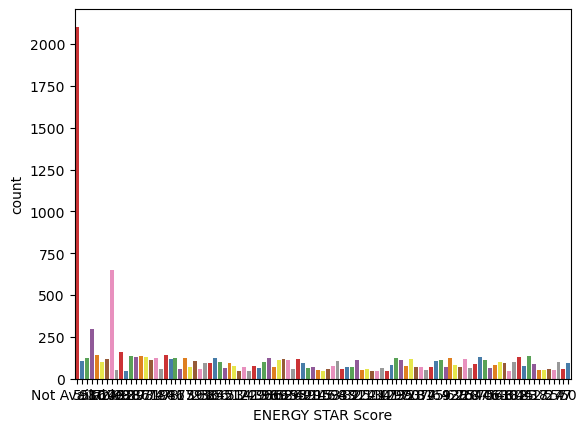

In [ ]:
sns.countplot(x="ENERGY STAR Score", data=df,palette='Set1')

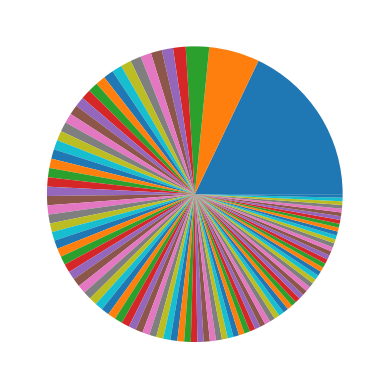

In [ ]:
plt.pie(df["ENERGY STAR Score"].value_counts())
plt.show()

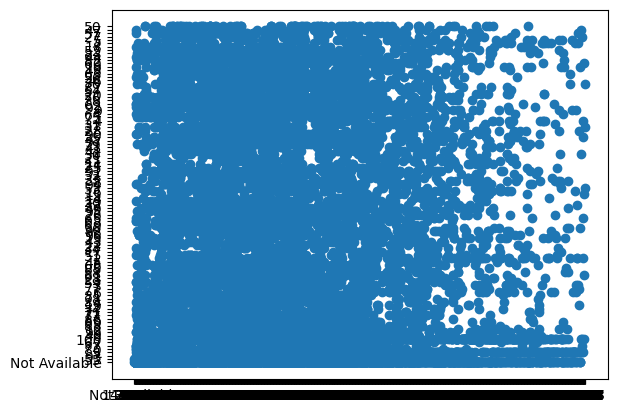

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=df["Site EUI (kBtu/ft²)"], y=df["ENERGY STAR Score"])



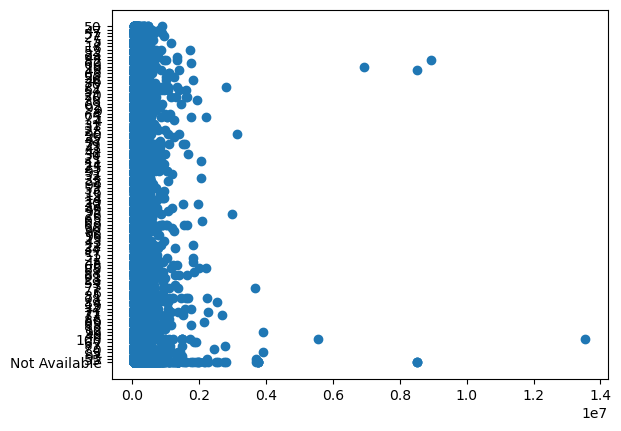

In [ ]:
plt.scatter(x=df["DOF Gross Floor Area"], y=df["ENERGY STAR Score"])

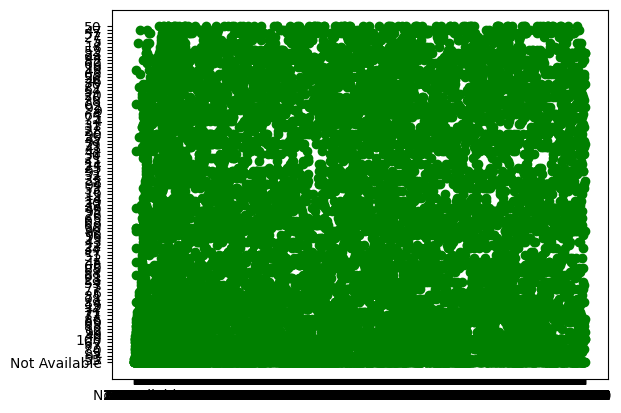

In [ ]:
plt.scatter(x=df["Largest Property Use Type - Gross Floor Area (ft²)"],y=df["ENERGY STAR Score"],color="green")

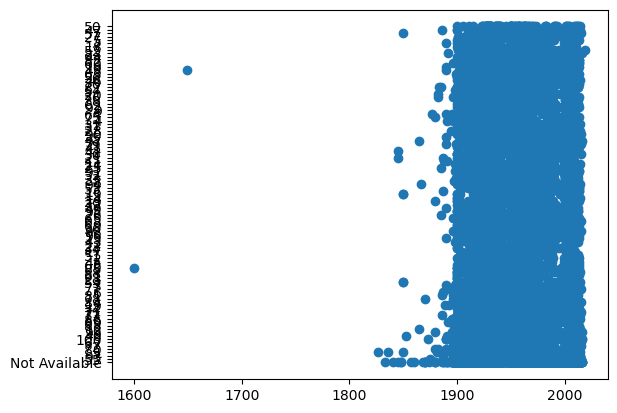

In [ ]:
plt.scatter(x=df["Year Built"], y=df["ENERGY STAR Score"])

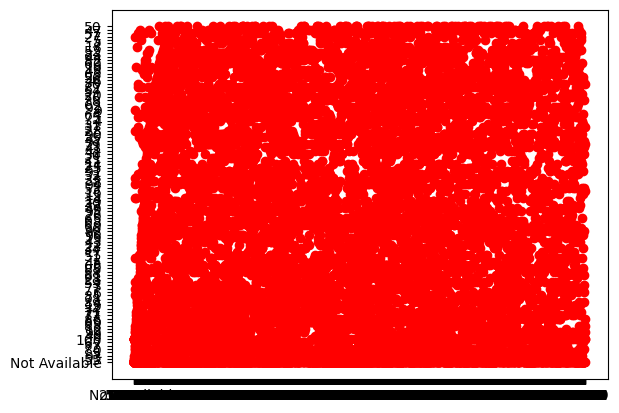

In [ ]:
plt.scatter(x=df["Total GHG Emissions (Metric Tons CO2e)"], y=df["ENERGY STAR Score"],color= "red")

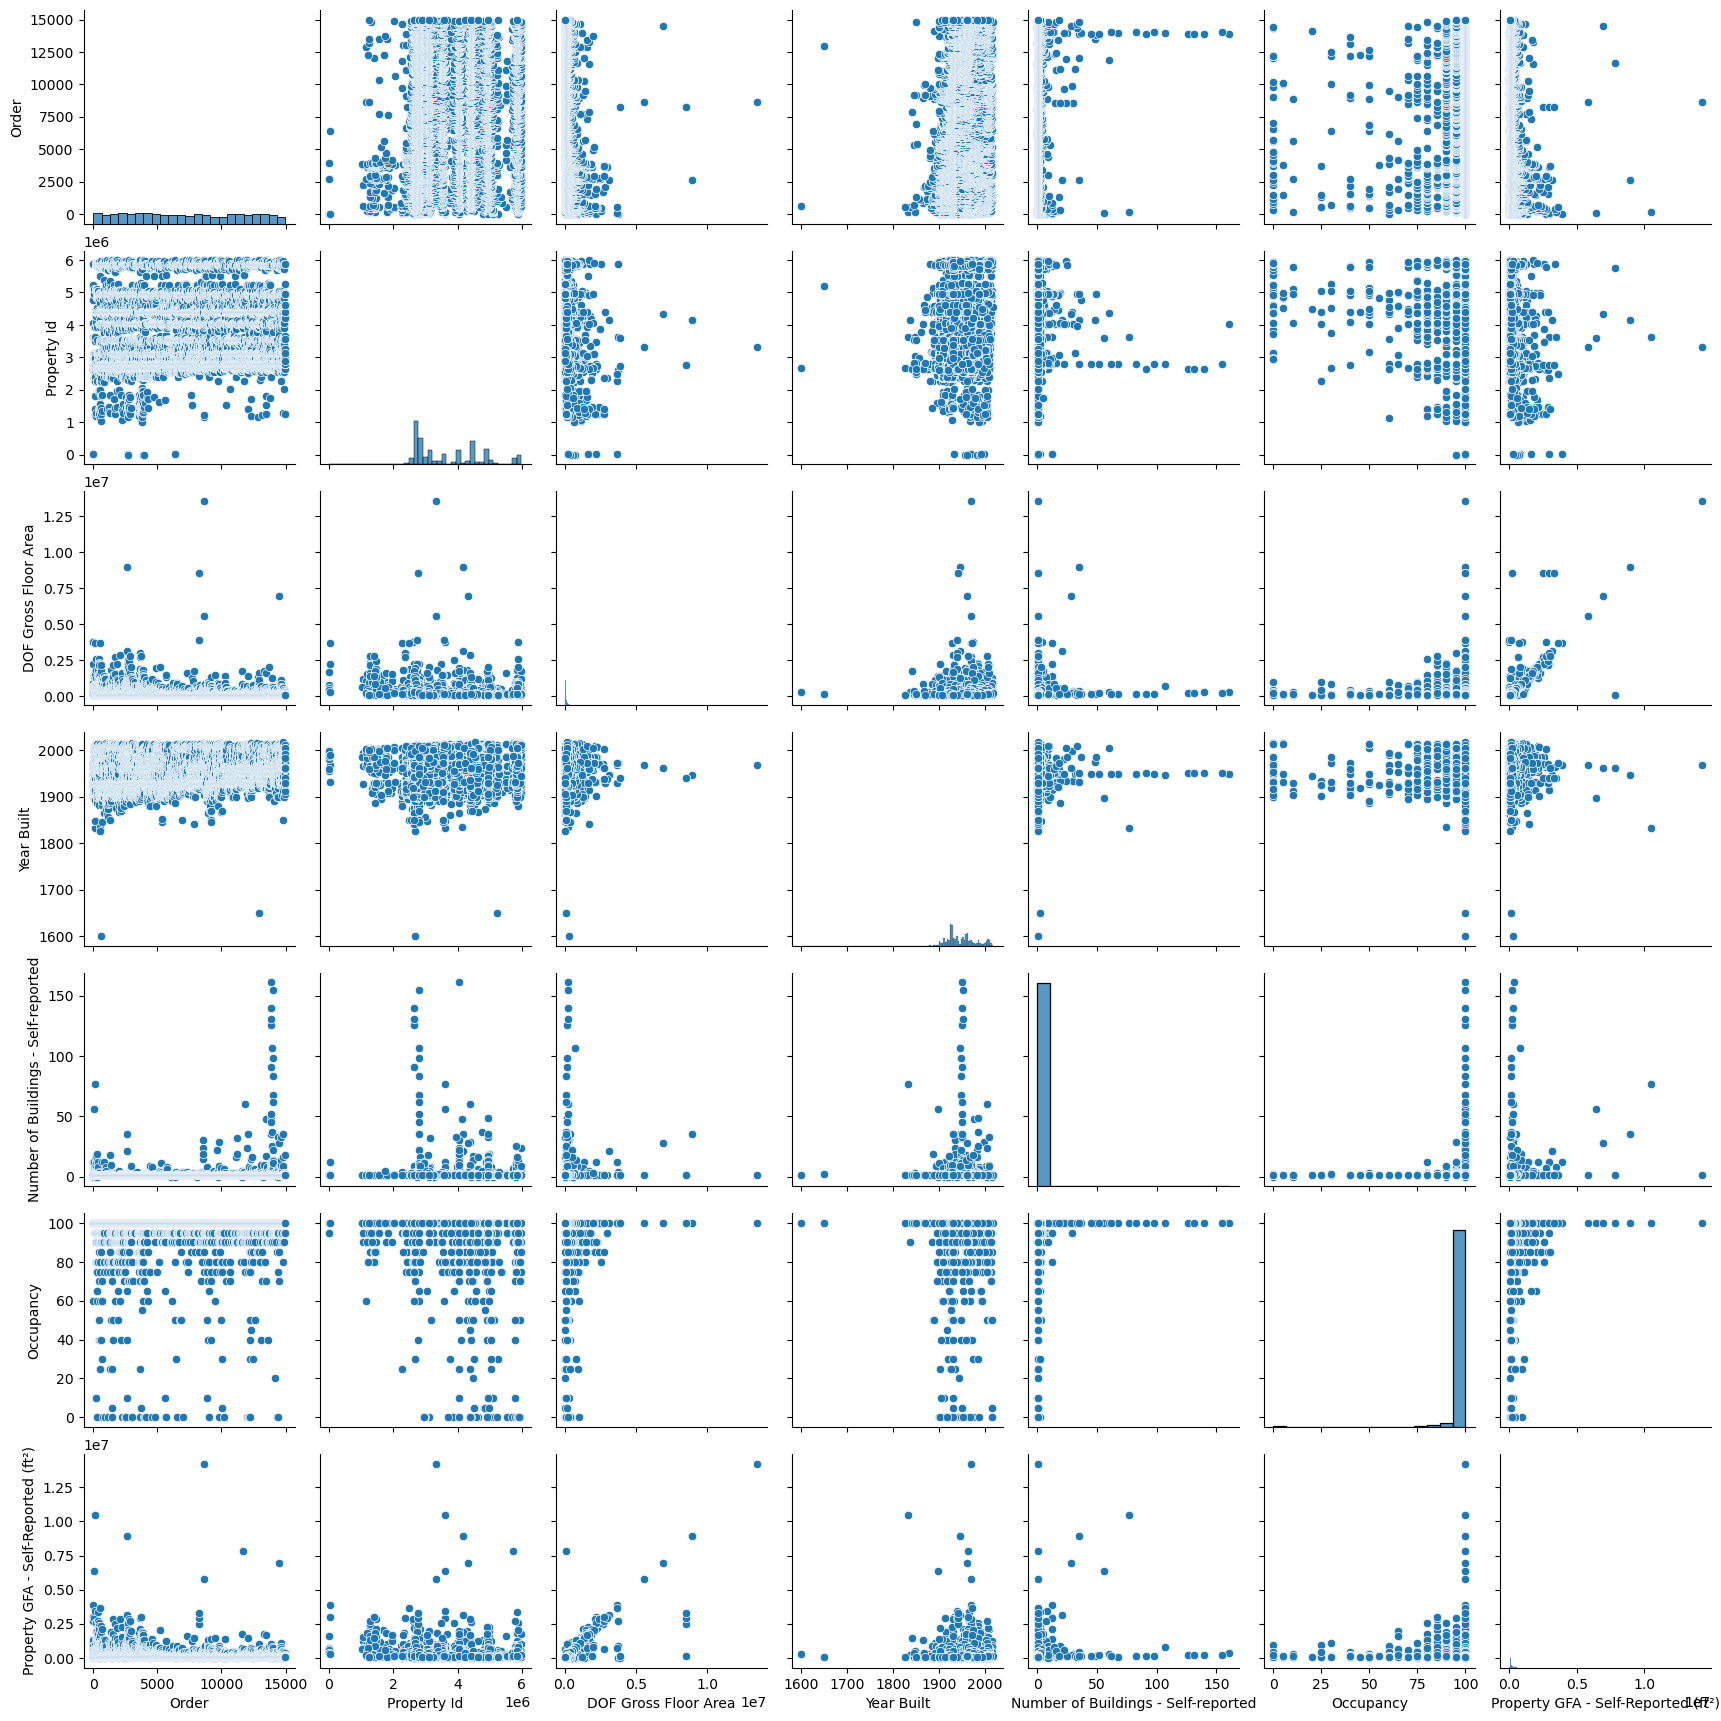

In [ ]:
sns.pairplot(df,palette='Set2')

<Axes: >

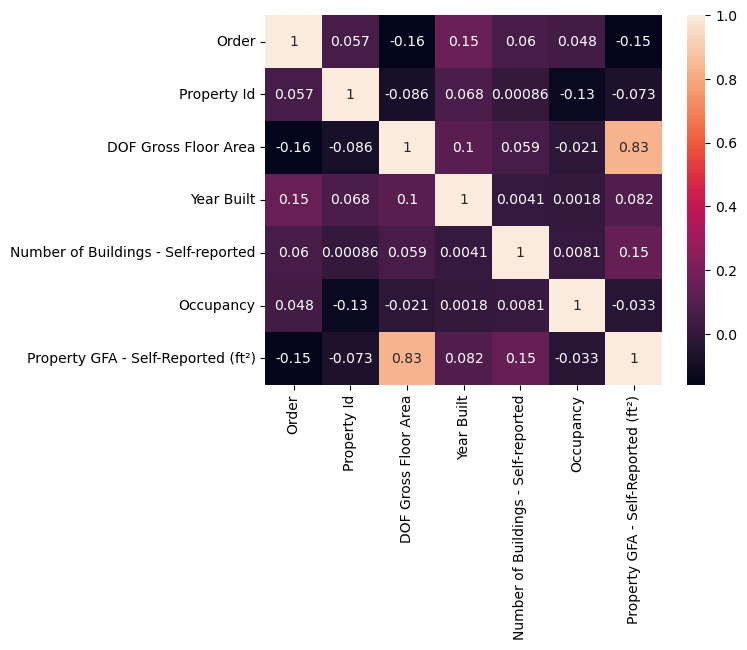

In [ ]:
#Using heatmap to find the correlation
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [ ]:
#shape of df
df.shape

(11746, 54)

In [ ]:
#columns of df
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weath

In [ ]:
#dropping the high correlation feature
df = df.drop(columns=['DOF Gross Floor Area'])

In [ ]:
# After dropping the high correlation feature
df.shape

(11746, 53)

In [ ]:
#checking columns after droping the feature.
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Elect

In [ ]:
df["ENERGY STAR Score"]

0        Not Available
1                   55
2        Not Available
3        Not Available
4        Not Available
             ...      
11741               98
11742               16
11743               83
11744               92
11745               19
Name: ENERGY STAR Score, Length: 11746, dtype: object

In [ ]:
#replacing 'Not Available' values with nan.
df["ENERGY STAR Score"]=df["ENERGY STAR Score"].replace('Not Available',np.nan)

In [ ]:
#replacing nan values with median as it is a regression analysis.
df["ENERGY STAR Score"]=df["ENERGY STAR Score"].replace(np.nan,df["ENERGY STAR Score"].median())

In [ ]:
#checking features with replaced values.
df["ENERGY STAR Score"]

0        65.0
1          55
2        65.0
3        65.0
4        65.0
         ... 
11741      98
11742      16
11743      83
11744      92
11745      19
Name: ENERGY STAR Score, Length: 11746, dtype: object

Order                                     Axes(0.125,0.653529;0.227941x0.226471)
Property Id                            Axes(0.398529,0.653529;0.227941x0.226471)
Year Built                             Axes(0.672059,0.653529;0.227941x0.226471)
Number of Buildings - Self-reported       Axes(0.125,0.381765;0.227941x0.226471)
Occupancy                              Axes(0.398529,0.381765;0.227941x0.226471)
Property GFA - Self-Reported (ft²)     Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

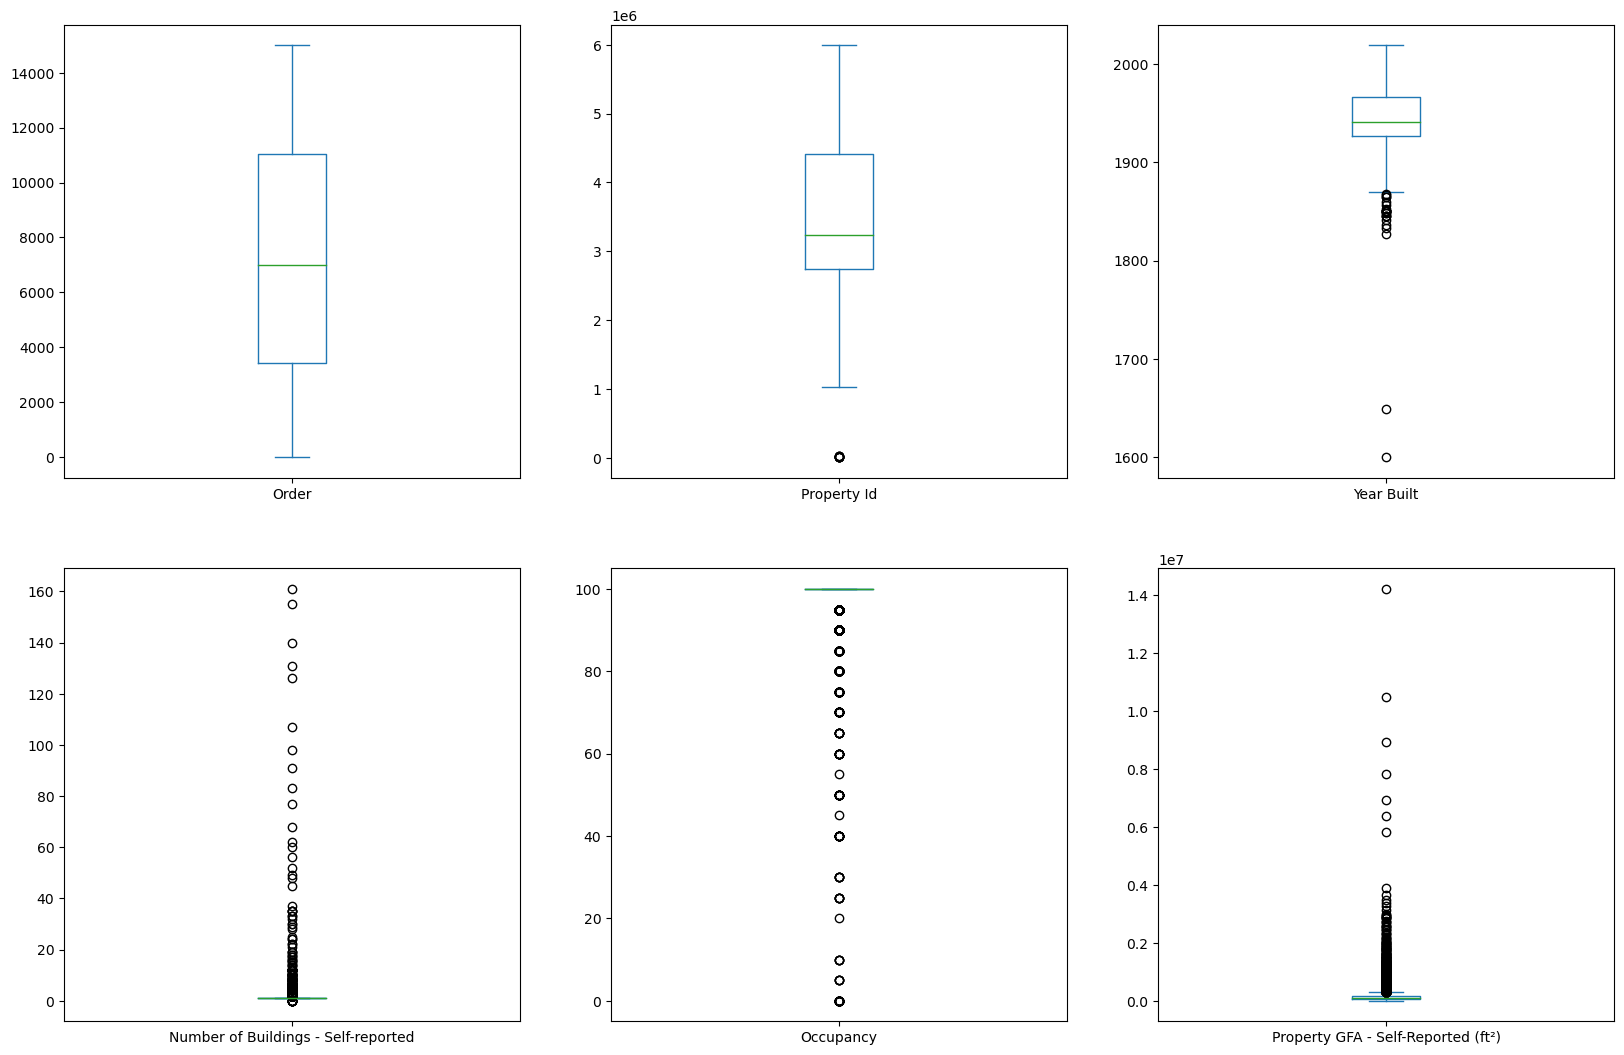

In [ ]:
#checking the outlier with boxplot.
df.plot(kind="box", subplots=True, layout=(3,3), figsize=(20,20))

In [ ]:
#replacing all the 'Not Available' values with nan.
df=df.replace('Not Available',np.nan)

In [ ]:
#replacing all the nan values with median as it is regression analysis.
df=df.replace(np.nan,df.median())

In [ ]:
#checking the updation.
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,...,6962.2,0,6962.2,762051,4692.5,45.095,619.4,05-01-2017 17:32,No,In Compliance
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,...,55870.4,51016.4,4854.1,3889181,4692.5,45.095,404.3,04/27/2017 11:23:27 AM,No,In Compliance
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,...,0,0,0,231342,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,0,0,0,1305748,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,...,0,0,0,179694,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance


# Checking and removing the outlier

In [ ]:
#Importing stats
from scipy import stats
#finding the values of Q1 and Q3
Q1=df["Year Built"].quantile(0.25)
Q3=df["Year Built"].quantile(0.75)

In [ ]:
Q1,Q3

(1927.0, 1966.0)

In [ ]:
#finding iqr
iqr=Q3-Q1
iqr

39.0

In [ ]:
#finding upper limit and lower limit
upperlimit=Q3+(1.5*iqr)
lowerlimit=Q1-(1.5*iqr)
upperlimit, lowerlimit

(2024.5, 1868.5)

In [ ]:
#removing outlier of "Year Built" column.
df2 = df[((df["Year Built"] > (Q1 - 1.5 * iqr)) & (df["Year Built"] < (Q3 + 1.5 * iqr)))]
df2.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,...,6962.2,0,6962.2,762051,4692.5,45.095,619.4,05-01-2017 17:32,No,In Compliance
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,...,55870.4,51016.4,4854.1,3889181,4692.5,45.095,404.3,04/27/2017 11:23:27 AM,No,In Compliance
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,...,0,0,0,231342,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,0,0,0,1305748,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,...,0,0,0,179694,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance


In [ ]:
df2.shape

(11722, 53)

In [ ]:
Q1=df["Number of Buildings - Self-reported"].quantile(0.25)
Q3=df["Number of Buildings - Self-reported"].quantile(0.75)

In [ ]:

Q1,Q3



(1.0, 1.0)

In [ ]:
#Q1 and Q3 values are same.

In [ ]:
Q1=df["Occupancy"].quantile(0.25)
Q3=df["Occupancy"].quantile(0.75)

In [ ]:
Q1,Q3

(100.0, 100.0)

In [ ]:
#Q1 and Q3 values are same.

In [ ]:
Q1=df["Property GFA - Self-Reported (ft²)"].quantile(0.25)
Q3=df["Property GFA - Self-Reported (ft²)"].quantile(0.75)

In [ ]:
#finding Q1 and Q3.
Q1,Q3

(66994.0, 158414.0)

In [ ]:
#Finding iqr.
iqr=Q3-Q1
iqr

91420.0

In [ ]:
#finding the upper limit and lower limit.
upperlimit=Q3+(1.5*iqr)
lowerlimit=Q1-(1.5*iqr)
upperlimit, lowerlimit

(295544.0, -70136.0)

In [ ]:
#removing the outlier and updating the values.
df3 = df2[((df2["Property GFA - Self-Reported (ft²)"] > (Q1 - 1.5 * iqr)) & (df2["Property GFA - Self-Reported (ft²)"] < (Q3 + 1.5 * iqr)))]
df3.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,...,0,0,0,231342,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,...,0,0,0,179694,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance
6,7,4778352,Annex Building & Garage,28402,NYP Cornell (East Campus),1014820040,1-01482-0040,1081252,523 East 70th St,515 East 70th St,...,0,0,0,245000,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,Yes,In Compliance
8,11,2611745,Towers Golf Course and Irrigation Wells,2610789,North Shore Towers,4084890001,4084890001,4456888,272-86 Grand Central Parkway,NaN,...,21.1,0,21.1,200,19261.1,96305.69,3574.2,04/28/2017 07:44:37 AM,Yes,In Compliance
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,aka 10 Clinton St,...,2846.8,2524.2,322.7,172656,4692.5,45.095,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance


In [ ]:
df3.shape

(10465, 53)

# Standardization

In [ ]:
#standardizing "Property GFA - Self-Reported (ft²)" column and updating the value.
df3["Property GFA - Self-Reported (ft²)_std"]=(df3["Property GFA - Self-Reported (ft²)"]-df3["Property GFA - Self-Reported (ft²)"].mean())/df3["Property GFA - Self-Reported (ft²)"].std()
df3.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Property GFA - Self-Reported (ft²)_std
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,...,0,0,231342,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance,2.275893
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,...,0,0,179694,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance,1.341902
6,7,4778352,Annex Building & Garage,28402,NYP Cornell (East Campus),1014820040,1-01482-0040,1081252,523 East 70th St,515 East 70th St,...,0,0,245000,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,Yes,In Compliance,2.522881
8,11,2611745,Towers Golf Course and Irrigation Wells,2610789,North Shore Towers,4084890001,4084890001,4456888,272-86 Grand Central Parkway,NaN,...,0,21.1,200,19261.1,96305.69,3574.2,04/28/2017 07:44:37 AM,Yes,In Compliance,-1.904028
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,aka 10 Clinton St,...,2524.2,322.7,172656,4692.5,45.095,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance,1.214628


# Normalization

In [ ]:
#Normalizing the "Property GFA - Self-Reported (ft²)" column.
df3["norm_Property GFA - Self-Reported (ft²)"]=(df3["Property GFA - Self-Reported (ft²)"]-df3["Property GFA - Self-Reported (ft²)"].min())/(df3["Property GFA - Self-Reported (ft²)"].max()-df3["Property GFA - Self-Reported (ft²)"].min())
df3.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Property GFA - Self-Reported (ft²)_std,norm_Property GFA - Self-Reported (ft²)
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,...,0,231342,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance,2.275893,0.783875
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,...,0,179694,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,In Compliance,1.341902,0.608872
6,7,4778352,Annex Building & Garage,28402,NYP Cornell (East Campus),1014820040,1-01482-0040,1081252,523 East 70th St,515 East 70th St,...,0,245000,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,Yes,In Compliance,2.522881,0.830154
8,11,2611745,Towers Golf Course and Irrigation Wells,2610789,North Shore Towers,4084890001,4084890001,4456888,272-86 Grand Central Parkway,NaN,...,21.1,200,19261.1,96305.69,3574.2,04/28/2017 07:44:37 AM,Yes,In Compliance,-1.904028,0.000678
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,aka 10 Clinton St,...,322.7,172656,4692.5,45.095,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance,1.214628,0.585025


In [ ]:
#finding the unique values.
df3["Property Name"].unique()

array(['MSCHoNY North', 'Neuro Institute', 'Annex Building & Garage', ...,
       '(9267) - 267 Sixth St', 'Advanced: 27 Prospect Park West',
       'Tryad: 420 Clinton Ave'], dtype=object)

In [ ]:
#finding the unique values.
df3["Parent Property Name"].unique()

array(['NYP Columbia (West Campus)', 'NYP Cornell (East Campus)',
       'North Shore Towers', 'Cadman Towers',
       'STATEN ISLAND UNIVERSITY HOSPITAL Seaview',
       '720-730 Ft. Washington Owners Corp.', 'Park 76th Street Inc.',
       '560 Riverside Drive', 'Meyer Hall',
       'Metro North - 420-440 East 102 St.',
       'Benjamin: 86-02 208 St (Parent)',
       'Benjamin: 206-10 86 Rd (Parent)',
       'Benjamin: 209-30 86 Drive (Parent)',
       'Columbia University (morningside)',
       'Columbia University Medical Center', 'Pace University NYC Campus',
       'Memorial Sloan Kettering Cancer Center 1',
       'New York University: Washington Square',
       'New York Eye & Ear Infirmary', '435 W 119 and 434 W 120',
       'College of Mt St Vincent', '1 hoyt st', '601 W 112 and 600 W 113',
       '430 W 119 ET AL', 'Manhattan Campus',
       'CubeSmart - 900 Atlantic Avenue, Brooklyn',
       'Jacobs Academic Building', 'Bay Plaza Community Center, LLC',
       'SHEEPSHEAD 

In [ ]:
#Removing the unwanted columns.
df3=df3.drop(['Property Name','Parent Property Name','Address 1 (self-reported)','NYC Borough, Block and Lot (BBL) self-reported','Address 2','Order','Property Id','Parent Property Id','BBL - 10 digits','DOF Benchmarking Submission Status','NYC Building Identification Number (BIN)','Street Name','Postal Code','Street Number','Metered Areas (Energy)','Primary Property Type - Self Selected','List of All Property Use Types at Property','Largest Property Use Type'], axis=1)

In [ ]:
#checking the updated df.
df3.head()

,Borough,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Water),...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Property GFA - Self-Reported (ft²)_std,norm_Property GFA - Self-Reported (ft²)
2,Manhattan,231342,NaN,8654.0,NaN,5000.0,1924,1,100,NaN,...,0,0,231342,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,2.275893,0.783875
4,Manhattan,179694,NaN,8654.0,NaN,5000.0,1932,1,100,NaN,...,0,0,179694,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,No,1.341902,0.608872
6,Manhattan,245000,NaN,8654.0,NaN,5000.0,1932,1,60,NaN,...,0,0,245000,4692.5,45.095,124.9,04/27/2017 11:23:27 AM,Yes,2.522881,0.830154
8,Queens,200,NaN,8654.0,NaN,5000.0,1974,1,100,NaN,...,0,21.1,200,19261.1,96305.69,3574.2,04/28/2017 07:44:37 AM,Yes,-1.904028,0.000678
13,Brooklyn,162656,Parking,40000,Retail Store,10000,1903,1,100,NaN,...,2524.2,322.7,172656,4692.5,45.095,352.2,04/28/2017 04:07:55 PM,NaN,1.214628,0.585025


# Encoding

In [ ]:
#Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#finding the unique values of the columns.
df3["Borough"].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Staten Island', nan, 'Bronx'],
      dtype=object)

In [ ]:
pd.get_dummies(df3,columns=["Borough"],drop_first=True).shape

(10465, 40)

In [ ]:
df3=pd.get_dummies(df3,columns=["Borough"],drop_first=True)

In [ ]:
df3.head()

,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Water),ENERGY STAR Score,...,Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Property GFA - Self-Reported (ft²)_std,norm_Property GFA - Self-Reported (ft²),Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island
2,231342,NaN,8654.0,NaN,5000.0,1924,1,100,NaN,65.0,...,45.095,124.9,04/27/2017 11:23:27 AM,No,2.275893,0.783875,0,1,0,0
4,179694,NaN,8654.0,NaN,5000.0,1932,1,100,NaN,65.0,...,45.095,124.9,04/27/2017 11:23:27 AM,No,1.341902,0.608872,0,1,0,0
6,245000,NaN,8654.0,NaN,5000.0,1932,1,60,NaN,65.0,...,45.095,124.9,04/27/2017 11:23:27 AM,Yes,2.522881,0.830154,0,1,0,0
8,200,NaN,8654.0,NaN,5000.0,1974,1,100,NaN,65.0,...,96305.69,3574.2,04/28/2017 07:44:37 AM,Yes,-1.904028,0.000678,0,0,1,0
13,162656,Parking,40000,Retail Store,10000,1903,1,100,NaN,1,...,45.095,352.2,04/28/2017 04:07:55 PM,NaN,1.214628,0.585025,1,0,0,0


In [ ]:
df3=pd.get_dummies(df3,columns=["Water Required?"],drop_first=True)

In [ ]:
df3.head()

,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Water),ENERGY STAR Score,...,Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Property GFA - Self-Reported (ft²)_std,norm_Property GFA - Self-Reported (ft²),Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Water Required?_Yes
2,231342,NaN,8654.0,NaN,5000.0,1924,1,100,NaN,65.0,...,45.095,124.9,04/27/2017 11:23:27 AM,2.275893,0.783875,0,1,0,0,0
4,179694,NaN,8654.0,NaN,5000.0,1932,1,100,NaN,65.0,...,45.095,124.9,04/27/2017 11:23:27 AM,1.341902,0.608872,0,1,0,0,0
6,245000,NaN,8654.0,NaN,5000.0,1932,1,60,NaN,65.0,...,45.095,124.9,04/27/2017 11:23:27 AM,2.522881,0.830154,0,1,0,0,1
8,200,NaN,8654.0,NaN,5000.0,1974,1,100,NaN,65.0,...,96305.69,3574.2,04/28/2017 07:44:37 AM,-1.904028,0.000678,0,0,1,0,1
13,162656,Parking,40000,Retail Store,10000,1903,1,100,NaN,1,...,45.095,352.2,04/28/2017 04:07:55 PM,1.214628,0.585025,1,0,0,0,0


# Train-Test Split

In [ ]:
#Importing train-test split
from sklearn.model_selection import train_test_split

In [ ]:
#converting the column to float data type.
df3['ENERGY STAR Score'] = df3['ENERGY STAR Score'].astype(float)

In [ ]:
column_types = df3.dtypes

# Identify the string columns
string_columns = column_types[column_types == 'object'].index

# Drop the string columns from the DataFrame
df3 = df3.drop(string_columns, axis=1)

In [ ]:
df3.columns

Index(['Year Built', 'Number of Buildings - Self-reported', 'Occupancy',
       'ENERGY STAR Score', 'Property GFA - Self-Reported (ft²)',
       'Property GFA - Self-Reported (ft²)_std',
       'norm_Property GFA - Self-Reported (ft²)', 'Borough_Brooklyn',
       'Borough_Manhattan', 'Borough_Queens', 'Borough_Staten Island',
       'Water Required?_Yes'],
      dtype='object')

In [ ]:
#Assigning X and y values.
X=df3.drop("ENERGY STAR Score",axis=1)
y=df3["ENERGY STAR Score"]


In [ ]:
#performing train -test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train.shape

(7325, 11)

In [ ]:
X_train.head

<bound method NDFrame.head of        Year Built  Number of Buildings - Self-reported  Occupancy  \
3639         2014                                    1        100   
689          1921                                    1        100   
7586         1918                                    1        100   
1698         1896                                    1         95   
8801         1955                                    1        100   
...           ...                                  ...        ...   
10775        1968                                    1        100   
1351         1930                                    1         95   
2160         1929                                    1        100   
589          1900                                    1        100   
6097         1963                                    1        100   

       Property GFA - Self-Reported (ft²)  \
3639                               290000   
689                                 66918   
7586  

In [ ]:
y_train.shape

(7325,)

In [ ]:
y_train.head

<bound method NDFrame.head of 3639     100.0
689       89.0
7586       1.0
1698      72.0
8801     100.0
         ...  
10775     60.0
1351     100.0
2160      65.0
589       81.0
6097      21.0
Name: ENERGY STAR Score, Length: 7325, dtype: float64>

# Modelling

In [ ]:
#importing DecisionTree.
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.05      0.04      0.05        93
         2.0       0.03      0.05      0.03        21
         3.0       0.00      0.00      0.00        21
         4.0       0.00      0.00      0.00        20
         5.0       0.00      0.00      0.00        11
         6.0       0.00      0.00      0.00        17
         7.0       0.05      0.08      0.06        13
         8.0       0.05      0.08      0.06        13
         9.0       0.00      0.00      0.00        22
        10.0       0.00      0.00      0.00        13
        11.0       0.08      0.08      0.08        13
        12.0       0.00      0.00      0.00        15
        13.0       0.00      0.00      0.00        13
        14.0       0.00      0.00      0.00         9
        15.0       0.00      0.00      0.00        15
        16.0       0.00      0.00      0.00        16
        17.0       0.00      0.00      0.00        18
        18.0       0.00    

In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 4  1  0 ...  0  1  3]
 [ 0  1  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  3]
 [ 2  0  1 ...  3  1  4]
 [ 4  4  1 ...  2  1 12]]


In [ ]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

289.93296979386116


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Year Built,-1.141377e-01
Number of Buildings - Self-reported,-1.726549e-01
Occupancy,-1.051519e-01
Property GFA - Self-Reported (ft²),2.046383e-05
Property GFA - Self-Reported (ft²)_std,3.700613e-10
norm_Property GFA - Self-Reported (ft²),6.933853e-11
Borough_Brooklyn,5.654938e+00
Borough_Manhattan,-1.657753e-02
Borough_Queens,4.015003e+00
Borough_Staten Island,5.700106e+00


In [ ]:
predictions = lm.predict(X_test)

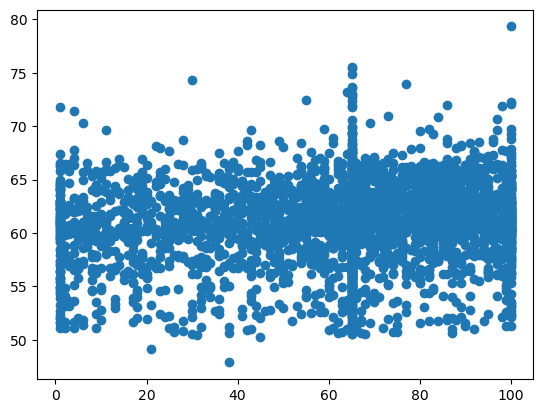

In [ ]:
plt.scatter(y_test,predictions)

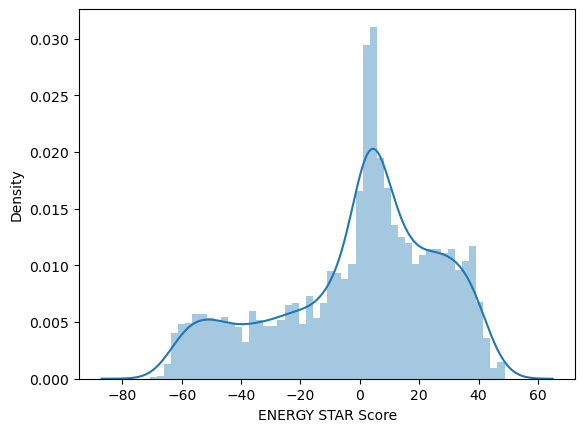

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
#importing the metrics.
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 21.321879651773994
MSE: 730.4024437684825
RMSE: 27.025958702116053


In [ ]:
#importing the KNeighborsClassifier.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

[[ 2  2  0 ...  0  0  3]
 [ 0  0  0 ...  0  1  2]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  3]
 [ 0  0  0 ...  3  2  2]
 [ 4  0  3 ...  3  0 12]]


In [ ]:
print(accuracy_score(y_test,pred))

0.05509554140127389


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.03      0.02      0.02        93
         2.0       0.00      0.00      0.00        21
         3.0       0.00      0.00      0.00        21
         4.0       0.00      0.00      0.00        20
         5.0       0.00      0.00      0.00        11
         6.0       0.00      0.00      0.00        17
         7.0       0.07      0.08      0.07        13
         8.0       0.00      0.00      0.00        13
         9.0       0.08      0.05      0.06        22
        10.0       0.00      0.00      0.00        13
        11.0       0.07      0.08      0.07        13
        12.0       0.00      0.00      0.00        15
        13.0       0.00      0.00      0.00        13
        14.0       0.00      0.00      0.00         9
        15.0       0.00      0.00      0.00        15
        16.0       0.00      0.00      0.00        16
        17.0       0.00      0.00      0.00        18
        18.0       0.00    

In [ ]:
#importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[ 2  3  0 ...  0  1  5]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  4]
 [ 1  0  0 ...  1  1  2]
 [ 3  1  0 ...  1  3 11]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       0.03      0.02      0.02        93
         2.0       0.00      0.00      0.00        21
         3.0       0.00      0.00      0.00        21
         4.0       0.00      0.00      0.00        20
         5.0       0.00      0.00      0.00        11
         6.0       0.00      0.00      0.00        17
         7.0       0.07      0.08      0.07        13
         8.0       0.00      0.00      0.00        13
         9.0       0.06      0.05      0.05        22
        10.0       0.00      0.00      0.00        13
        11.0       0.12      0.15      0.14        13
        12.0       0.00      0.00      0.00        15
        13.0       0.00      0.00      0.00        13
        14.0       0.00      0.00      0.00         9
        15.0       0.00      0.00      0.00        15
        16.0       0.00      0.00      0.00        16
        17.0       0.00      0.00      0.00        18
        18.0       0.00    

In [ ]:
print(accuracy_score(y_test,rfc_pred))

0.08885350318471337


In [ ]:
rfc.feature_importances_

array([0.21996196, 0.0103399 , 0.0208578 , 0.2297814 , 0.23048374,
       0.22946788, 0.00934348, 0.00518906, 0.01195393, 0.00382774,
       0.02879311])

<BarContainer object of 11 artists>

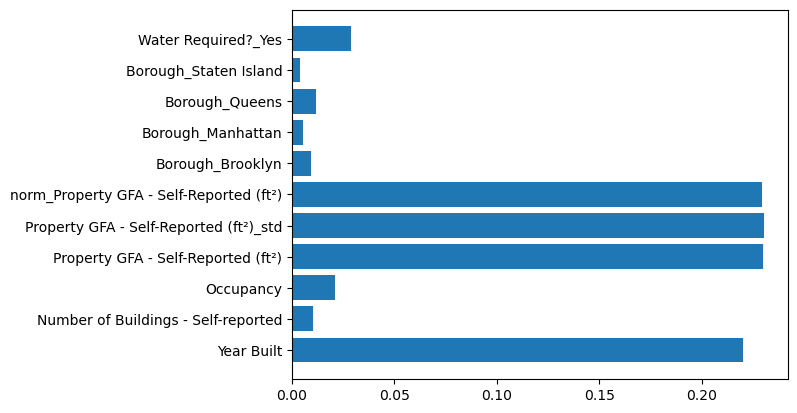

In [ ]:
plt.barh(X_train.columns, rfc.feature_importances_)

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)